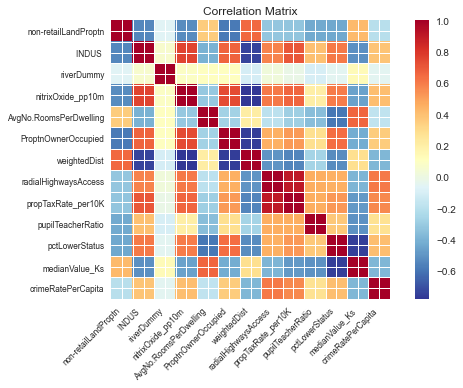

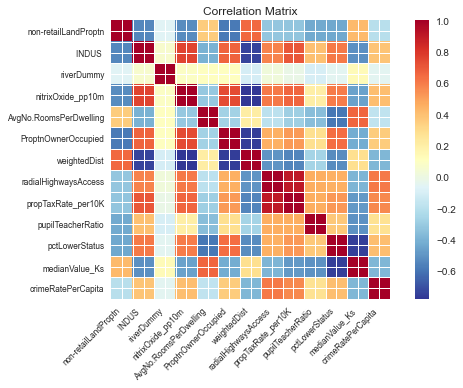

In [1]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

rawBostonData = pd.read_csv('.\Dataset\Boston.csv')
rawBostonData = rawBostonData.dropna()
rawBostonData = rawBostonData.drop_duplicates()

renamedBostonData = rawBostonData.rename(columns = {
    'CRIM': 'crimeRatePerCapita',
    ' ZN ': 'non-retailLandProptn',
    'CHAS': 'riverDummy',
    'NOX': 'nitrixOxide_pp10m',
    'RM': 'AvgNo.RoomsPerDwelling',
    'AGE': 'ProptnOwnerOccupied',
    'DIS': 'weightedDist',
    'RAD': 'radialHighwaysAccess',
    'TAX': 'propTaxRate_per10K',
    'PTRATIO': 'pupilTeacherRatio',
    'LSTAT': 'pctLowerStatus',
    'MEDV': 'medianValue_Ks'
})

X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

corrMatrix = train_data.corr(method = 'pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
            title=None, normcolor=False, cmap='RdYlBu_r')

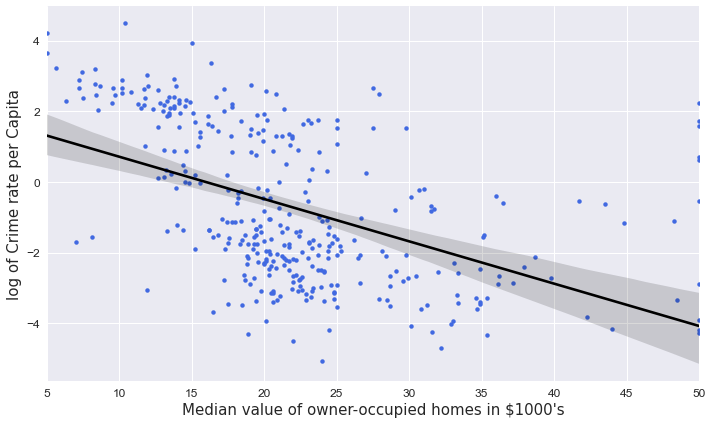

In [2]:
# fig - canvas object
# ax - graph object
fig, ax = plt.subplots(figsize=(10, 6))

# Use the np.log() function to transform the dependent variable, y.
y = np.log(train_data['crimeRatePerCapita'])

# ci - confidence interval
# a confidence intervale gives an estimated range that is likely to contain the true
# value.
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax, color='k', scatter_kws={"s": 20, "color": "royalblue", "alpha": 1})

# set the x and y axis labels
ax.set_ylabel('log of Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()